[Data Source](https://www.kaggle.com/datasets/marianadeem755/bestsellers-unveiled-global-top-selling-books/data)

In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('/Books Viz/best_selling_books_2.csv')
data.head()

,Rank,Title,Author,Volume Sales,Publisher,Genre
0,1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas


In [3]:
data.shape

(100, 6)

In [5]:
data.columns

Index(['Rank', 'Title', 'Author', 'Volume Sales', 'Publisher', 'Genre'], dtype='object')

In [5]:
data.describe(include='all')

,Rank,Title,Author,Volume Sales,Publisher,Genre
count,100.000000,100,100,100,100,100
unique,NaN,100,67,100,16,21
top,NaN,"Da Vinci Code,The","Rowling, J.K.","5,094,805",Random House,General & Literary Fiction
freq,NaN,1,9,1,19,33
mean,50.500000,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check the data types of each column
data.dtypes

Rank             int64
Title           object
Author          object
Volume Sales    object
Publisher       object
Genre           object
dtype: object

In [13]:
# Change data type for volume of sales
data['Volume Sales'] = pd.to_numeric(data['Volume Sales'].str.replace(',', ''), errors='coerce')

In [17]:
# Check if the data type is numeric formated in non-scientific notation
data['Volume Sales'].describe().apply(lambda x: f'{x:,.0f}')

count          100
mean     1,497,272
std        907,740
min        791,095
25%        942,058
50%      1,111,938
75%      1,781,836
max      5,094,805
Name: Volume Sales, dtype: object

In [18]:
# Check for missing values
data.isnull().sum()

Rank            0
Title           0
Author          0
Volume Sales    0
Publisher       0
Genre           0
dtype: int64

In [20]:
# Descriptive stats

# Author and Publisher Summary
unique_authors = data['Author'].nunique()
print(f'Number of unique authors: {unique_authors}')

unique_publishers = data['Publisher'].nunique()
print(f'Number of unique publishers: {unique_publishers}')

top_authors = data['Author'].value_counts().head(10)
print('Top 10 Authors:\n', top_authors)

top_publishers = data['Publisher'].value_counts().head(10)
print('Top 10 Publishers:\n', top_publishers)

Number of unique authors: 67
Number of unique publishers: 16
Top 10 Authors:
 Author
Rowling, J.K.       9
Brown, Dan          5
Oliver, Jamie       5
Meyer, Stephenie    4
Pullman, Philip     3
James, E. L.        3
Larsson, Stieg      3
Bryson, Bill        3
Donaldson, Julia    3
Pelzer, Dave        2
Name: count, dtype: int64
Top 10 Publishers:
 Publisher
Random House          19
Transworld            14
Penguin               14
Bloomsbury            11
Pan Macmillan          7
HarperCollins          7
Little, Brown Book     6
Orion                  5
Scholastic Ltd.        4
Quercus                3
Name: count, dtype: int64


In [22]:
# Genre Distribution
genre_distribution = data['Genre'].value_counts()
genre_distribution

Genre
General & Literary Fiction                   33
Crime, Thriller & Adventure                  13
Young Adult Fiction                           9
Children's Fiction                            8
Food & Drink: General                         6
Picture Books                                 4
Autobiography: The Arts                       4
Romance & Sagas                               3
Autobiography: General                        3
Fitness & Diet                                3
Popular Science                               2
Science Fiction & Fantasy                     2
Travel Writing                                2
Current Affairs & Issues                      1
Children's Annuals                            1
National & Regional Cuisine                   1
Biography: The Arts                           1
Popular Culture & Media: General Interest     1
Usage & Writing Guides                        1
Humour: Collections & General                 1
Biography: General                

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

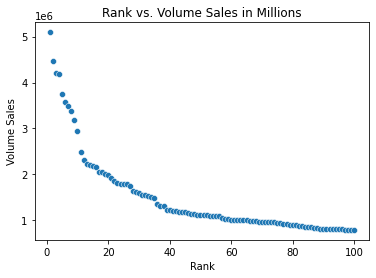

In [27]:
# Relationships between variables

# Rank vs. Volume Sales
sns.scatterplot(x=data['Rank'], y=data['Volume Sales'])
plt.title('Rank vs. Volume Sales in Millions')
plt.show()

In [34]:
# Group by author and sum or average the sales
author_sales_sum = data.groupby('Author')['Volume Sales'].sum().sort_values(ascending=False)
author_sales_avg = data.groupby('Author')['Volume Sales'].mean().sort_values(ascending=False)

# Group by publisher and sum or average the sales
publisher_sales_sum = data.groupby('Publisher')['Volume Sales'].sum().sort_values(ascending=False)
publisher_sales_avg = data.groupby('Publisher')['Volume Sales'].mean().sort_values(ascending=False)

# Group by genre and sum or average the sales
genre_sales_sum = data.groupby('Genre')['Volume Sales'].sum().sort_values(ascending=False)
genre_sales_avg = data.groupby('Genre')['Volume Sales'].mean().sort_values(ascending=False)


# Get the top 10 authors and publishers by total sales
top_10_authors = author_sales_sum.head(10)
top_10_publishers = publisher_sales_sum.head(10)
genre_sales_sum
print(top_10_authors)
print(top_10_publishers)
print(genre_sales_sum)

Author
Rowling, J.K.       28494745
Brown, Dan          14462827
James, E. L.         8432648
Meyer, Stephenie     8308136
Larsson, Stieg       5603489
Oliver, Jamie        5160955
Donaldson, Julia     3832515
Bryson, Bill         3675078
Pullman, Philip      3220977
Hosseini, Khaled     3213111
Name: Volume Sales, dtype: int64
Publisher
Bloomsbury            31707856
Random House          27124816
Transworld            23481592
Penguin               15109759
Little, Brown Book    10383181
Pan Macmillan          9085383
HarperCollins          7590622
Quercus                5603489
Orion                  5091561
Scholastic Ltd.        4013164
Name: Volume Sales, dtype: int64
Genre
General & Literary Fiction                   38469803
Children's Fiction                           27341564
Crime, Thriller & Adventure                  25071822
Young Adult Fiction                          13325714
Romance & Sagas                               8432648
Food & Drink: General                    

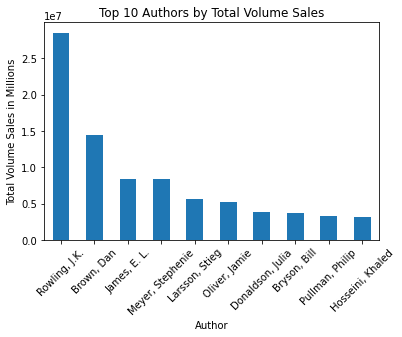

In [35]:
# Author vs. Volume Sales (Top 10 Authors)
top_10_authors.plot(kind='bar', title='Top 10 Authors by Total Volume Sales')
plt.ylabel('Total Volume Sales in Millions')
plt.xlabel('Author')
plt.xticks(rotation=45)
plt.show()

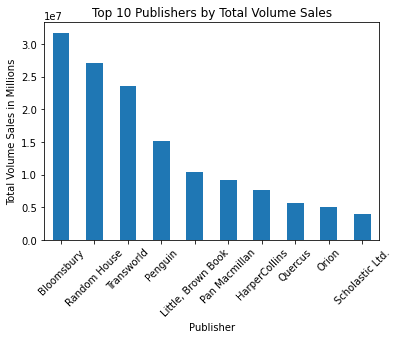

In [41]:
# Publisher vs. Volume Sales (Top 10 Publishers)
top_10_publishers.plot(kind='bar', title='Top 10 Publishers by Total Volume Sales')
plt.ylabel('Total Volume Sales in Millions')
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.show()

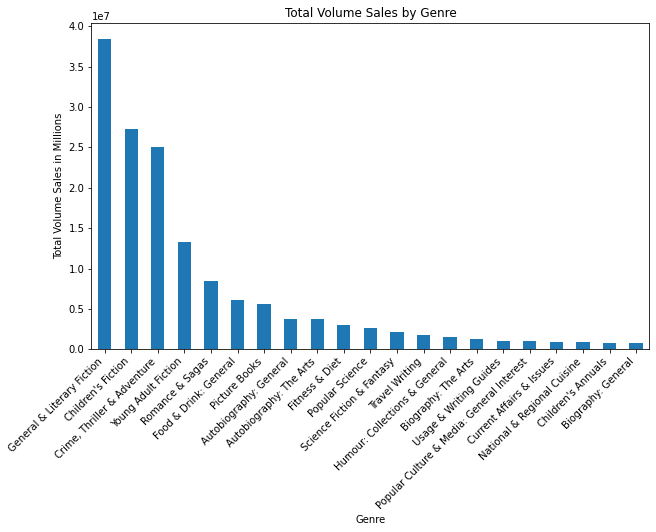

In [40]:
# Genre vs. Volume Sales
plt.figure(figsize=(10, 6))
genre_sales_sum.plot(kind='bar', title='Total Volume Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Volume Sales in Millions')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Summary:

1. Dataset contains 100 rows and 6 columns: 'Rank', 'Title', 'Author', 'Volume Sales', 'Publisher', 'Genre'
2. There are no missing values in the dataset.
3. Dataset contains 67 unique authors, 16 unique publishers and 21 unique genres. 
4. Top 5 authors by sold book counts are Rowling, J.K., Brown, Dan, James, E. L, Meyer, Stephenie and Larsson, Stieg.
5. Top 5 publishers by sold book counts are Bloomsbury, Random House, Transworld, Penguin and Little, Brown Book.
6. Top 5 genres of sold books are General & Literary Fiction, Children's Fiction, Crime, Thriller & Adventure, Young Adult Fiction and Romance & Sagas.